### Assignment 3

In [102]:
import pandas as pd

In [103]:
df = pd.read_csv("bank.csv",sep=';')
df['job'] = df['job'].map({'unemployed':0,
 'services':1,
 'management':2,
 'blue-collar':3,
 'self-employed':4,
 'technician':5,
 'entrepreneur':6,
 'admin.':7,
 'student':8,
 'housemaid':9,
 'retired':10,
 'unknown':11})
df['marital'] = df['marital'].map({'married':1, 'single':0, 'divorced':2})
df['education'] = df['education'].map({'primary':0, 'secondary':1, 'tertiary':2, 'unknown':3})
df['default'] = df['default'].map({'no':0, 'yes':1})
df['housing'] = df['housing'].map({'no':0, 'yes':1})
df['loan'] = df['loan'].map({'no':0, 'yes':1})
df['contact'] = df['contact'].map({'cellular':1, 'unknown':0, 'telephone':2})
df['month'] = df['month'].map({'oct':10,
 'may':5,
 'apr':4,
 'jun':6,
 'feb':2,
 'aug':8,
 'jan':1,
 'jul':7,
 'nov':11,
 'sep':9,
 'mar':3,
 'dec':12})
df['y'] = df['y'].map({'no':0, 'yes':1})
df['poutcome'] = df['poutcome'].map({'unknown':2, 'failure':0, 'other':3, 'success':1})
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,0,1,0,0,1787,0,0,1,19,10,79,1,-1,0,2,0
1,33,1,1,1,0,4789,1,1,1,11,5,220,1,339,4,0,0
2,35,2,0,2,0,1350,1,0,1,16,4,185,1,330,1,0,0
3,30,2,1,2,0,1476,1,1,0,3,6,199,4,-1,0,2,0
4,59,3,1,1,0,0,1,0,0,5,5,226,1,-1,0,2,0


In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        4521 non-null   int64
 1   job        4521 non-null   int64
 2   marital    4521 non-null   int64
 3   education  4521 non-null   int64
 4   default    4521 non-null   int64
 5   balance    4521 non-null   int64
 6   housing    4521 non-null   int64
 7   loan       4521 non-null   int64
 8   contact    4521 non-null   int64
 9   day        4521 non-null   int64
 10  month      4521 non-null   int64
 11  duration   4521 non-null   int64
 12  campaign   4521 non-null   int64
 13  pdays      4521 non-null   int64
 14  previous   4521 non-null   int64
 15  poutcome   4521 non-null   int64
 16  y          4521 non-null   int64
dtypes: int64(17)
memory usage: 600.6 KB


In [105]:
X = df.drop('y', axis=1)
y = df['y']

#### Split Data

In [107]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

#### Data Scaling

In [108]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### Create Model and Train it using LogisticRegression

In [109]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, f1_score

# train model logreg
modelLogReg = LogisticRegression(solver='liblinear', C=0.05, multi_class='ovr',random_state=0)
modelLogReg.fit(X_train,y_train)

# testing
y_pred = modelLogReg.predict(X_test)


# get accuracy train using .score()
print(f"akurasi train : {modelLogReg.score(X_train,y_train)}")

# get accuracy test using .score()
print(f"akurasi test : {modelLogReg.score(X_test,y_test)}")

# get confusion matrix
cmLogReg = confusion_matrix(y_test, y_pred)
print(f"confusion matix : {cmLogReg}")



akurasi train : 0.8938053097345132
akurasi test : 0.8629834254143647
confusion matix : [[771  13]
 [111  10]]


#### Visualisasi CM LogReg

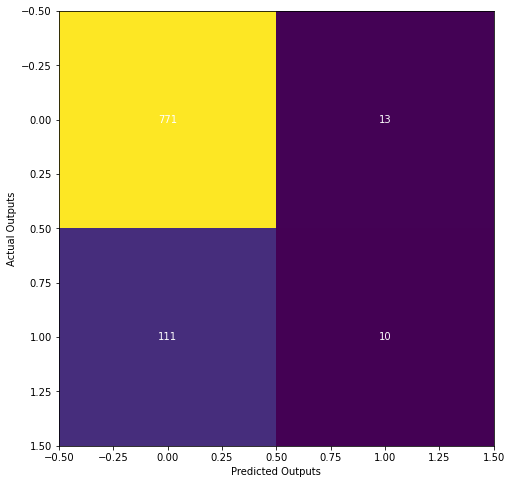

In [110]:
fig,ax = plt.subplots(figsize=(8,8))
ax.imshow(cmLogReg)
ax.grid(False)
ax.set_xlabel('Predicted Outputs', color='black')
ax.set_ylabel('Actual Outputs', color='black')
for i in range(2):
    for j in range(2):
        ax.text(j,i,cmLogReg[i,j],ha='center',va='center',color='white')
plt.show()

#### Classification Report using Log - Reg

In [93]:
# evaluasi
print(classification_report(y_test, y_pred))

print(f"fi score  : {f1_score(y_test, y_pred, labels=[1], average='micro')}")

              precision    recall  f1-score   support

           0       0.88      0.96      0.92       784
           1       0.33      0.14      0.20       121

    accuracy                           0.85       905
   macro avg       0.61      0.55      0.56       905
weighted avg       0.81      0.85      0.82       905

fi score  : 0.19767441860465115


#### Create Model and Train it using KNeighborsClassifier

In [111]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
# train model KNN
modelKNN = KNeighborsClassifier()
modelKNN.fit(X_train, y_train)

# testing
y_predKNN = modelKNN.predict(X_test)

# get accuracy train using .score()
print(f"akurasi train : {modelKNN.score(X_train,y_train)}")

# get accuracy test using .score()
print(f"akurasi test : {modelKNN.score(X_test,y_test)}")

# get accuracy using metrics
print(f"akurasi : {metrics.accuracy_score(y_test, y_predKNN)}")

# get confusion matrix
cmKNN = confusion_matrix(y_test, y_predKNN)
print(f"confusion matix : {cmKNN}")


akurasi train : 0.9112278761061947
akurasi test : 0.8475138121546961
akurasi : 0.8475138121546961
confusion matix : [[750  34]
 [104  17]]


#### Classification Report using KNN

In [112]:
# evaluasi
print(classification_report(y_test, y_predKNN))

# f1 score
print(f"fi score : {f1_score(y_test, y_predKNN, labels=[1], average='micro')}")

              precision    recall  f1-score   support

           0       0.88      0.96      0.92       784
           1       0.33      0.14      0.20       121

    accuracy                           0.85       905
   macro avg       0.61      0.55      0.56       905
weighted avg       0.81      0.85      0.82       905

fi score : 0.19767441860465115


#### Create Model and Train it using Support Vectore Machine

In [113]:
from sklearn.svm import LinearSVC
# train model svm
modelSVM = LinearSVC()
modelSVM.fit(X_train, y_train)

# testing
y_predSVM = modelSVM.predict(X_test)

# get accuracy train using .score()
print(f"akurasi train : {modelSVM.score(X_train,y_train)}")

# get accuracy test using .score()
print(f"akurasi test : {modelSVM.score(X_test,y_test)}")

# get accuracy using metrics
print(f"akurasi : {metrics.accuracy_score(y_test, y_predSVM)}")

# get confusion matrix
cmSVM = confusion_matrix(y_test, y_predSVM)
print(f"confusion matix : {cmSVM}")


akurasi train : 0.271570796460177
akurasi test : 0.30165745856353593
akurasi : 0.30165745856353593
confusion matix : [[156 628]
 [  4 117]]


C:\Users\20210257\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


#### Classification Report using SVM

In [114]:
# evaluasi
print(classification_report(y_test, y_predSVM))

# f1 score
print(f"fi score : {f1_score(y_test, y_predSVM, labels=[1], average='micro')}")

              precision    recall  f1-score   support

           0       0.97      0.20      0.33       784
           1       0.16      0.97      0.27       121

    accuracy                           0.30       905
   macro avg       0.57      0.58      0.30       905
weighted avg       0.87      0.30      0.32       905

fi score : 0.2702078521939954


#### Create Model and Train it using Decision Tree

In [119]:
from sklearn.tree import DecisionTreeClassifier
# train model Decision Tree
modelDTC = DecisionTreeClassifier()
modelDTC.fit(X_train, y_train)

# testing
y_predDTC = modelDTC.predict(X_test)

# get accuracy train using .score()
print(f"akurasi train : {modelDTC.score(X_train,y_train)}")

# get accuracy test using .score()
print(f"akurasi test : {modelDTC.score(X_test,y_test)}")

# get accuracy using metrics
print(f"akurasi : {metrics.accuracy_score(y_test, y_predDTC)}")

# get confusion matrix
cmDTC = confusion_matrix(y_test, y_predDTC)
print(f"confusion matix : {cmDTC}")


akurasi train : 1.0
akurasi test : 0.8629834254143647
akurasi : 0.8629834254143647
confusion matix : [[735  49]
 [ 75  46]]


#### Classification Report using Decision Tree

In [120]:
# evaluasi
print(classification_report(y_test, y_predDTC))

# f1 score
print(f"fi score : {f1_score(y_test, y_predDTC, labels=[1], average='micro')}")

              precision    recall  f1-score   support

           0       0.91      0.94      0.92       784
           1       0.48      0.38      0.43       121

    accuracy                           0.86       905
   macro avg       0.70      0.66      0.67       905
weighted avg       0.85      0.86      0.86       905

fi score : 0.42592592592592593


#### Create Model and Train it using Random Forest

In [121]:
from sklearn.ensemble import RandomForestClassifier
# train model Decision Tree
modelRandomForest = RandomForestClassifier()
modelRandomForest.fit(X_train, y_train)

# testing
y_predRandomForest = modelRandomForest.predict(X_test)

# get accuracy train using .score()
print(f"akurasi train : {modelRandomForest.score(X_train,y_train)}")

# get accuracy test using .score()
print(f"akurasi test : {modelRandomForest.score(X_test,y_test)}")

# get accuracy using metrics
print(f"akurasi : {metrics.accuracy_score(y_test, y_predRandomForest)}")

# get confusion matrix
cmRandomForest = confusion_matrix(y_test, y_predRandomForest)
print(f"confusion matix : {cmRandomForest}")


akurasi train : 1.0
akurasi test : 0.876243093922652
akurasi : 0.876243093922652
confusion matix : [[763  21]
 [ 91  30]]


#### Classification Report using Random Forest

In [122]:
# evaluasi
print(classification_report(y_test, y_predRandomForest))

# f1 score
print(f"fi score : {f1_score(y_test, y_predRandomForest, labels=[1], average='micro')}")

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       784
           1       0.59      0.25      0.35       121

    accuracy                           0.88       905
   macro avg       0.74      0.61      0.64       905
weighted avg       0.85      0.88      0.85       905

fi score : 0.3488372093023256


#### Create Model and Train it using Naive Bayes

In [123]:
from sklearn.naive_bayes import GaussianNB
# train model Decision Tree
modelNB = GaussianNB()
modelNB.fit(X_train, y_train)

# testing
y_predNB = modelNB.predict(X_test)

# get accuracy train using .score()
print(f"akurasi train : {modelNB.score(X_train,y_train)}")

# get accuracy test using .score()
print(f"akurasi test : {modelNB.score(X_test,y_test)}")

# get accuracy using metrics
print(f"akurasi : {metrics.accuracy_score(y_test, y_predNB)}")

# get confusion matrix
cmNB = confusion_matrix(y_test, y_predNB)
print(f"confusion matix : {cmNB}")


akurasi train : 0.8476216814159292
akurasi test : 0.8331491712707182
akurasi : 0.8331491712707182
confusion matix : [[707  77]
 [ 74  47]]


#### Classification Report using Naive Bayes

In [124]:
# evaluasi
print(classification_report(y_test, y_predNB))

# f1 score
print(f"fi score : {f1_score(y_test, y_predNB, labels=[1], average='micro')}")

              precision    recall  f1-score   support

           0       0.91      0.90      0.90       784
           1       0.38      0.39      0.38       121

    accuracy                           0.83       905
   macro avg       0.64      0.65      0.64       905
weighted avg       0.83      0.83      0.83       905

fi score : 0.38367346938775515
